In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [21]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident
0       2016-03-31
1       2016-03-31
2       2016-04-01
3       2016-03-25
4       2016-04-02
5       2016-04-01
6       2016-04-01
7       2016-04-02
8       2016-04-02
9       2016-04-03
10      2016-04-03
11      2016-04-02
12      2016-04-02
13      2016-04-02
14      2016-04-02
15      2016-04-02
16      2016-04-04
17      2016-04-02
18      2016-04-04
19      2016-04-02
20      2016-03-23
21      2016-04-02
22      2016-04-02
23      2016-04-04
24      2016-04-04
25      2016-04-05
26      2016-03-30
27      2016-04-06
28      2016-04-06
29      2016-04-06
...            ...
9029    2019-10-07
9030    2019-10-07
9031    2019-10-07
9032    2019-10-07
9033    2019-10-07
9034    2019-10-07
9035    2019-10-07
9036    2019-10-04
9037    2019-10-07
9038    2019-10-08
9039    2019-10-08
9040    2019-09-23
9041    2019-10-08
9042    2019-10-08
9043    2019-10-07
9044    2019-10-09
9045    2019-10-07
9046    2019-10-08
9047    2019-10-10
9048    2019-10-10
9049    2019

In [22]:
df = df[df.inc_dincident > '2016-03-31']
df = df[df.inc_dincident < '2019-10-05']
print(df)

     inc_dincident
2       2016-04-01
4       2016-04-02
5       2016-04-01
6       2016-04-01
7       2016-04-02
8       2016-04-02
9       2016-04-03
10      2016-04-03
11      2016-04-02
12      2016-04-02
13      2016-04-02
14      2016-04-02
15      2016-04-02
16      2016-04-04
17      2016-04-02
18      2016-04-04
19      2016-04-02
21      2016-04-02
22      2016-04-02
23      2016-04-04
24      2016-04-04
25      2016-04-05
27      2016-04-06
28      2016-04-06
29      2016-04-06
30      2016-04-06
31      2016-04-06
32      2016-04-06
33      2016-04-07
34      2016-04-05
...            ...
8991    2019-10-02
8992    2019-10-02
8993    2019-10-02
8994    2019-10-02
8995    2019-10-01
8996    2019-10-03
8997    2019-10-01
8998    2019-10-02
8999    2019-10-03
9000    2019-10-02
9001    2019-10-03
9002    2019-10-03
9003    2019-10-03
9004    2019-10-03
9005    2019-10-03
9006    2019-10-03
9007    2019-10-03
9008    2019-10-04
9009    2019-10-04
9010    2019-10-03
9011    2019

In [23]:
df['weekday'] = df['inc_dincident'].dt.weekday
print(df)

     inc_dincident  weekday
2       2016-04-01        4
4       2016-04-02        5
5       2016-04-01        4
6       2016-04-01        4
7       2016-04-02        5
8       2016-04-02        5
9       2016-04-03        6
10      2016-04-03        6
11      2016-04-02        5
12      2016-04-02        5
13      2016-04-02        5
14      2016-04-02        5
15      2016-04-02        5
16      2016-04-04        0
17      2016-04-02        5
18      2016-04-04        0
19      2016-04-02        5
21      2016-04-02        5
22      2016-04-02        5
23      2016-04-04        0
24      2016-04-04        0
25      2016-04-05        1
27      2016-04-06        2
28      2016-04-06        2
29      2016-04-06        2
30      2016-04-06        2
31      2016-04-06        2
32      2016-04-06        2
33      2016-04-07        3
34      2016-04-05        1
...            ...      ...
8991    2019-10-02        2
8992    2019-10-02        2
8993    2019-10-02        2
8994    2019-10-02  

In [24]:
total_weeks = (max(df.inc_dincident)-min(df.inc_dincident)).days/7
print(total_weeks)

183.0


(-0.5, 3301.5, 495.5, -0.5)

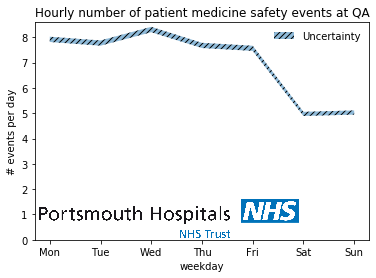

In [47]:
bins = [i-0.5 for i in range(8)]
data_x = [i for i in range(7)]
data_y_tot,_ = np.histogram(df.weekday.values, bins=bins)
data_y = data_y_tot/total_weeks
data_y_err = np.sqrt(data_y_tot)/total_weeks
plt.fill_between(data_x,data_y-data_y_err/2,y2=data_y+data_y_err/2,alpha=0.5,hatch="////",label='Uncertainty')
plt.legend(frameon=False)
plt.ylim(bottom=0)
ax = plt.gca()
locs, labels = plt.xticks()
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('weekday');
plt.ylabel('# events per day')
plt.title('Hourly number of patient medicine safety events at QA');
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,-0.1, 0.6, 0.6], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels